In [22]:
import pandas as pd

url="./Phishing.csv"
df=pd.read_csv(url)

In [44]:
# Worse with only changing result vs all (???)
# Change result instances of -1 to 0
df['Result'].values[df['Result'].values < 0] = 0

# Change all instances of -1 to 0
# df.values[df.values < 0] = 0

In [45]:
# Get Row with a missing value
null_data = df[df.isnull().any(axis=1)]
null_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [46]:
from sklearn.impute import SimpleImputer

# Use mean value for any nan values
df.fillna(df.mean(), inplace=True)

In [47]:
from sklearn.model_selection import train_test_split

# split data up into training and test data
x = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
import numpy as np

# Fix the random seed
np.random.seed(7)

# Serialize the numpy arrays
np.save("X_train.npy", x_train), np.save("y_train.npy", y_train)
np.save("X_test.npy", x_train), np.save("y_test.npy", y_train)

(None, None)

In [49]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.metrics import precision_recall_fscore_support

t = precision_recall_fscore_support(y_test, logisticRegr.predict(x_test), average='micro')
t

(0.9163274536408865, 0.9163274536408865, 0.9163274536408865, None)

In [51]:
from sklearn import metrics

y_pred=logisticRegr.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 854,  102],
       [  83, 1172]])

In [52]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

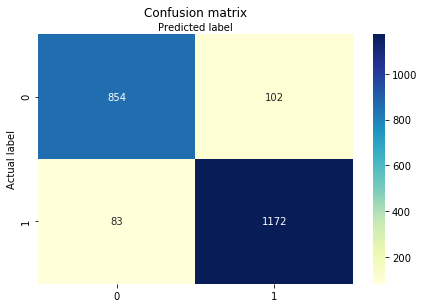

In [53]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9163274536408865
Precision: 0.9199372056514914
Recall: 0.9338645418326693


From the above classification report, we can see that the model is able to detect 91.6% of phishing websites with 91.9% precision.

In [55]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

In [56]:
# Model building using the Sequential API
model = Sequential()

model.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=x.shape[1]))
model.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid',
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


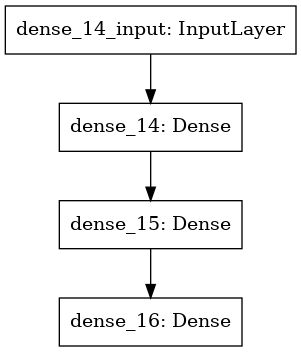

In [58]:
import tensorflow as tf
import keras

keras.utils.plot_model(model, to_file='model.png')

In [59]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [60]:
history = model.fit(x_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
8844/8844 [==============================] - 0s 46us/step - loss: 0.4890 - accuracy: 0.7472
Epoch 2/128
8844/8844 [==============================] - 0s 34us/step - loss: 0.2417 - accuracy: 0.9038
Epoch 3/128
8844/8844 [==============================] - 0s 31us/step - loss: 0.2273 - accuracy: 0.9091
Epoch 4/128
8844/8844 [==============================] - 0s 31us/step - loss: 0.2226 - accuracy: 0.9126
Epoch 5/128
8844/8844 [==============================] - 0s 32us/step - loss: 0.2216 - accuracy: 0.9123
Epoch 6/128
8844/8844 [==============================] - 0s 32us/step - loss: 0.2167 - accuracy: 0.9140
Epoch 7/128
8844/8844 [==============================] - 0s 32us/step - loss: 0.2130 - accuracy: 0.9153
Epoch 8/128
8844/8844 [==============================] - 0s 32us/step - loss: 0.2103 - accuracy: 0.9176
Epoch 9/128
8844/8844 [==============================] - 0s 31us/step - loss: 0.2080 - accuracy: 0.9180
Epoch 10/128
8844/8844 [==============================] - 0s 31u

TDLHBA hyperparameters

In [61]:
model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=30))
model_TDLHBA.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [63]:
history_TDLHBA = model_TDLHBA.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
8844/8844 [==============================] - 2s 197us/step - loss: 0.2860 - accuracy: 0.8743
Epoch 2/100
8844/8844 [==============================] - 2s 198us/step - loss: 0.2203 - accuracy: 0.9118
Epoch 3/100
8844/8844 [==============================] - 2s 194us/step - loss: 0.2122 - accuracy: 0.9156
Epoch 4/100
8844/8844 [==============================] - 2s 195us/step - loss: 0.2060 - accuracy: 0.9176
Epoch 5/100
8844/8844 [==============================] - 2s 213us/step - loss: 0.1995 - accuracy: 0.9196
Epoch 6/100
8844/8844 [==============================] - 2s 184us/step - loss: 0.1939 - accuracy: 0.9211
Epoch 7/100
8844/8844 [==============================] - 2s 178us/step - loss: 0.1889 - accuracy: 0.9215
Epoch 8/100
8844/8844 [==============================] - 2s 174us/step - loss: 0.1835 - accuracy: 0.9246
Epoch 9/100
8844/8844 [==============================] - 2s 172us/step - loss: 0.1786 - accuracy: 0.9262
Epoch 10/100
8844/8844 [==============================]